In [1]:
# Here I'm importing my libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")
submission_df = pd.read_csv("../data/sample_submission.csv")

In [38]:
test_df.head()

,id,prompt,response_a,response_b
0,136060,"[""I have three oranges today, I ate an orange ...","[""You have two oranges today.""]","[""You still have three oranges. Eating an oran..."
1,211333,"[""You are a mediator in a heated political deb...","[""Thank you for sharing the details of the sit...","[""Mr Reddy and Ms Blue both have valid points ..."
2,1233961,"[""How to initialize the classification head wh...","[""When you want to initialize the classificati...","[""To initialize the classification head when p..."


In [37]:
submission_df.head()

,id,winner_model_a,winner_model_b,winner_tie
0,136060,0.333333,0.333333,0.333333
1,211333,0.333333,0.333333,0.333333
2,1233961,0.333333,0.333333,0.333333


In [5]:
# Inspect the data to understand the basic structure. This is a multi-class classification problem
train_df.head(4)

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0


In [6]:
# Here we are checking the class distribution to determine if the dataset is balanced or unbalanced. 
print(train_df[['winner_model_a', 'winner_model_b', 'winner_tie']].sum())

winner_model_a    20064
winner_model_b    19652
winner_tie        17761
dtype: int64


In [29]:
train_df[['winner_model_a']].sum() #+ train_df[['winner_model_b']].sum() + train_df[['winner_tie']].sum()

test_number_a = train_df[['winner_model_a']].sum()
print(test_number_a)
print(type(test_number_a))

test_number_a = int(test_number_a.iloc[0])
print(test_number_a)
print(type(test_number_a))

test_number_b = train_df[['winner_model_b']].sum()
print(test_number_b)
print(type(test_number_b))

test_number_b = int(test_number_b.iloc[0])
print(test_number_b)
print(type(test_number_b))

test_number_tie = train_df[['winner_tie']].sum()
print(test_number_tie)
print(type(test_number_tie))

test_number_tie = int(test_number_tie.iloc[0])
print(test_number_tie)
print(type(test_number_tie))


total = test_number_tie + test_number_a + test_number_b
total


#model_a_number = int(print(train_df[['winner_model_a']].sum()))
#model_b_number = int(print(train_df[['winner_model_b']].sum()))
#tie_number = int(print(train_df[['winner_tie']].sum()))
#print(model_a_number + model_b_number + tie_number)

winner_model_a    20064
dtype: int64
<class 'pandas.core.series.Series'>
20064
<class 'int'>
winner_model_b    19652
dtype: int64
<class 'pandas.core.series.Series'>
19652
<class 'int'>
winner_tie    17761
dtype: int64
<class 'pandas.core.series.Series'>
17761
<class 'int'>


57477

In [32]:
total_records = len(train_df)
print(f"Total Records: {total_records}")
total

Total Records: 57477


57477

In [34]:
#A simpler version of the previous 2 cells
total = train_df[['winner_model_a', 'winner_model_b', 'winner_tie']].sum().sum()
print(f"Total from outcomes: {total}")

Total from outcomes: 57477


In [6]:
# This code checks how often each model wins 
model_wins = pd.concat([
    train_df[train_df['winner_model_a'] == 1]['model_a'].value_counts(),
    train_df[train_df['winner_model_b'] == 1]['model_b'].value_counts()
]).sort_values(ascending=False)
print(model_wins)

gpt-4-1106-preview          2054
gpt-4-1106-preview          2019
gpt-4-0613                  1280
gpt-3.5-turbo-0613          1213
gpt-4-0613                  1170
                            ... 
qwen1.5-7b-chat               22
qwen1.5-4b-chat               19
qwen1.5-4b-chat               16
mistral-7b-instruct-v0.2      15
mistral-7b-instruct-v0.2      12
Name: count, Length: 128, dtype: int64


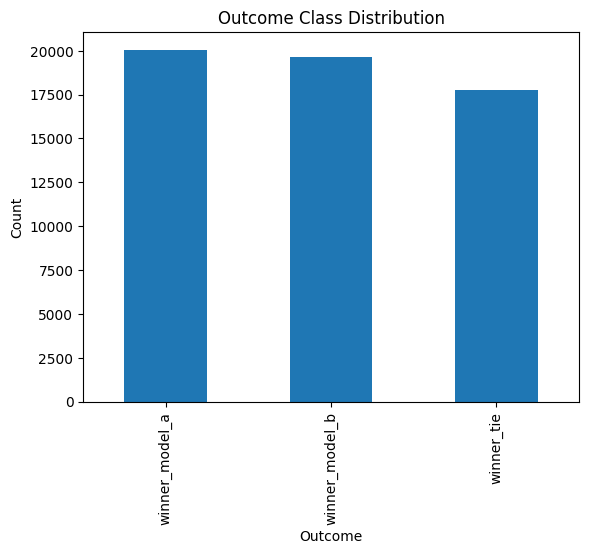

In [8]:
# Plot class distribution
class_counts = train_df[['winner_model_a', 'winner_model_b', 'winner_tie']].sum()
class_counts.plot(kind='bar', title='Outcome Class Distribution')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

In [9]:
# Count occurrences of each model in both columns
model_freq = pd.concat([
    train_df['model_a'].value_counts(),
    train_df['model_b'].value_counts()
], axis=1).fillna(0).sum(axis=1).sort_values(ascending=False)

print(model_freq.head(10))

gpt-4-1106-preview            7387
gpt-3.5-turbo-0613            7083
gpt-4-0613                    6165
claude-2.1                    5583
claude-instant-1              4136
gpt-4-0314                    4122
claude-1                      3978
vicuna-33b                    3720
mixtral-8x7b-instruct-v0.1    3545
vicuna-13b                    3448
dtype: int64


In [10]:
# Calculate response lengths
train_df['len_a'] = train_df['response_a'].str.len()
train_df['len_b'] = train_df['response_b'].str.len()

# Compare average lengths by outcome
outcome_cols = ['winner_model_a', 'winner_model_b', 'winner_tie']
for col in outcome_cols:
    subset = train_df[train_df[col] == 1]
    print(f"Average length when {col} wins:")
    print(subset[['len_a', 'len_b']].mean())

Average length when winner_model_a wins:
len_a    1567.619219
len_b    1314.128937
dtype: float64
Average length when winner_model_b wins:
len_a    1291.267810
len_b    1569.113678
dtype: float64
Average length when winner_tie wins:
len_a    1259.174089
len_b    1265.105456
dtype: float64


In [11]:
# Check if prompts or responses are duplicated across rows
print(train_df.duplicated(subset=['prompt']).sum())
print(train_df.duplicated(subset=['response_a']).sum())

5743
911


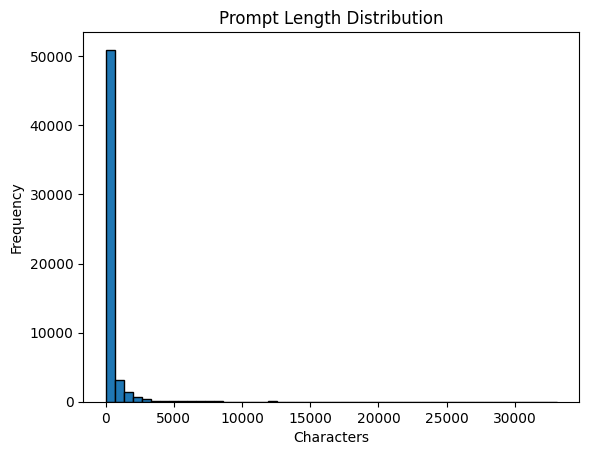

In [12]:
train_df['prompt_len'] = train_df['prompt'].str.len()
plt.hist(train_df['prompt_len'], bins=50, edgecolor='black')
plt.title('Prompt Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Frequency')
plt.show()

In [13]:
# Tokenize prompts (basic example)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
prompt_terms = vectorizer.fit_transform(train_df['prompt'])
print(vectorizer.get_feature_names_out()[:50])

['00' '000' '0000' '000000' '00000000000000000'
 '0000000000000000000000000000000000000000612b3caa0114bd90912dcb18'
 '000000000011011'
 '000000000011111111112222222222333333333344444444445555555555'
 '00000000011' '00000000c0000017' '00001' '000019' '000026' '000029'
 '000032' '000049' '000066' '00007' '000082' '0000q0' '0000q1' '0001'
 '0001x' '0002' '0003' '0003536' '0004' '00041' '0005' '0007' '000e'
 '000fmt' '000hrs' '000ltr' '000m2' '000ms' '000pcs' '000x' '000z' '001'
 '0010' '00101' '0011' '0012' '001345' '00136' '001461' '001463' '0015'
 '001575']


In [14]:
# Compare win rates for specific model pairs
model_pairs = train_df.groupby(['model_a', 'model_b']).size().reset_index(name='count')
for _, row in model_pairs.iterrows():
    a, b = row['model_a'], row['model_b']
    subset = train_df[(train_df['model_a'] == a) & (train_df['model_b'] == b)]
    print(f"Model pair: {a} vs {b}")
    print(subset[['winner_model_a', 'winner_model_b', 'winner_tie']].sum())

Model pair: RWKV-4-Raven-14B vs alpaca-13b
winner_model_a    16
winner_model_b    11
winner_tie         8
dtype: int64
Model pair: RWKV-4-Raven-14B vs chatglm-6b
winner_model_a    12
winner_model_b     9
winner_tie        17
dtype: int64
Model pair: RWKV-4-Raven-14B vs claude-1
winner_model_a     6
winner_model_b    29
winner_tie        11
dtype: int64
Model pair: RWKV-4-Raven-14B vs claude-2.0
winner_model_a    1
winner_model_b    3
winner_tie        0
dtype: int64
Model pair: RWKV-4-Raven-14B vs claude-instant-1
winner_model_a     2
winner_model_b    15
winner_tie         7
dtype: int64
Model pair: RWKV-4-Raven-14B vs dolly-v2-12b
winner_model_a    7
winner_model_b    3
winner_tie        8
dtype: int64
Model pair: RWKV-4-Raven-14B vs fastchat-t5-3b
winner_model_a    11
winner_model_b     9
winner_tie        12
dtype: int64
Model pair: RWKV-4-Raven-14B vs gpt-3.5-turbo-0314
winner_model_a    10
winner_model_b    29
winner_tie         9
dtype: int64
Model pair: RWKV-4-Raven-14B vs gpt-

In [15]:
#Data quality checks
print(train_df.isnull().sum())

id                0
model_a           0
model_b           0
prompt            0
response_a        0
response_b        0
winner_model_a    0
winner_model_b    0
winner_tie        0
len_a             0
len_b             0
prompt_len        0
dtype: int64


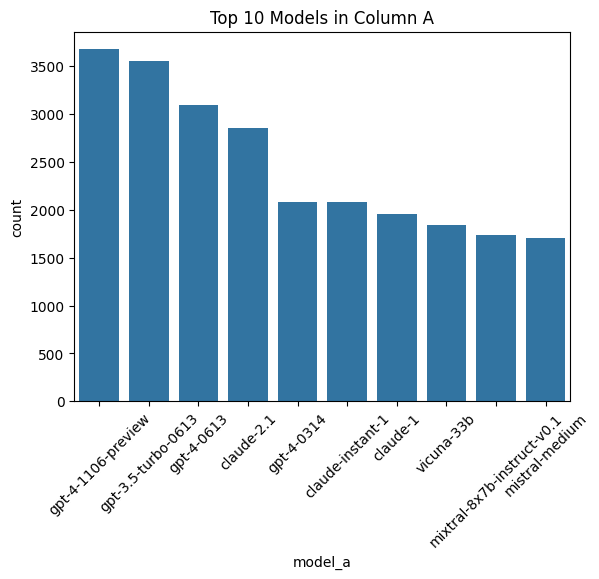

In [17]:
import seaborn as sns

# Example: Model frequency
sns.countplot(data=train_df, x='model_a', order=train_df['model_a'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title('Top 10 Models in Column A')
plt.show()

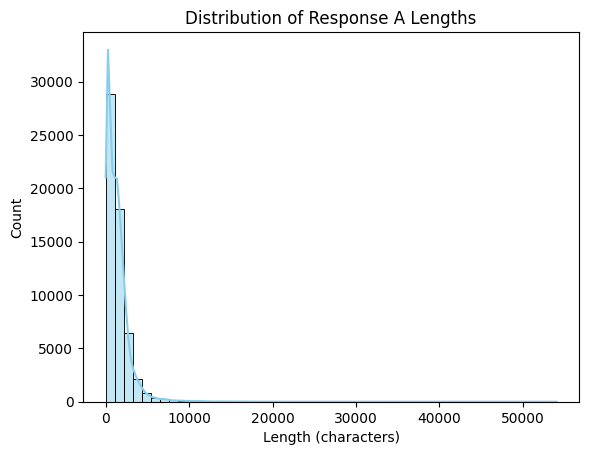

In [18]:
# Example: Response length distribution
sns.histplot(train_df['len_a'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Response A Lengths')
plt.xlabel('Length (characters)')
plt.show()

/tmp/ipykernel_1803/3098822434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_df, x='winner_model_a', y='len_a', palette='viridis')


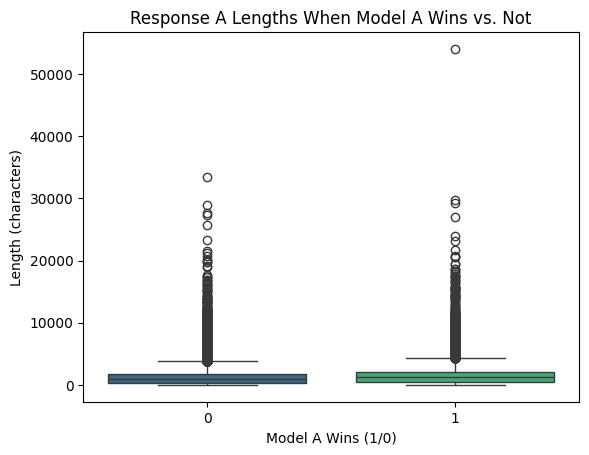

In [19]:
# Example: Response lengths by outcome
sns.boxplot(data=train_df, x='winner_model_a', y='len_a', palette='viridis')
plt.title('Response A Lengths When Model A Wins vs. Not')
plt.xlabel('Model A Wins (1/0)')
plt.ylabel('Length (characters)')
plt.show()

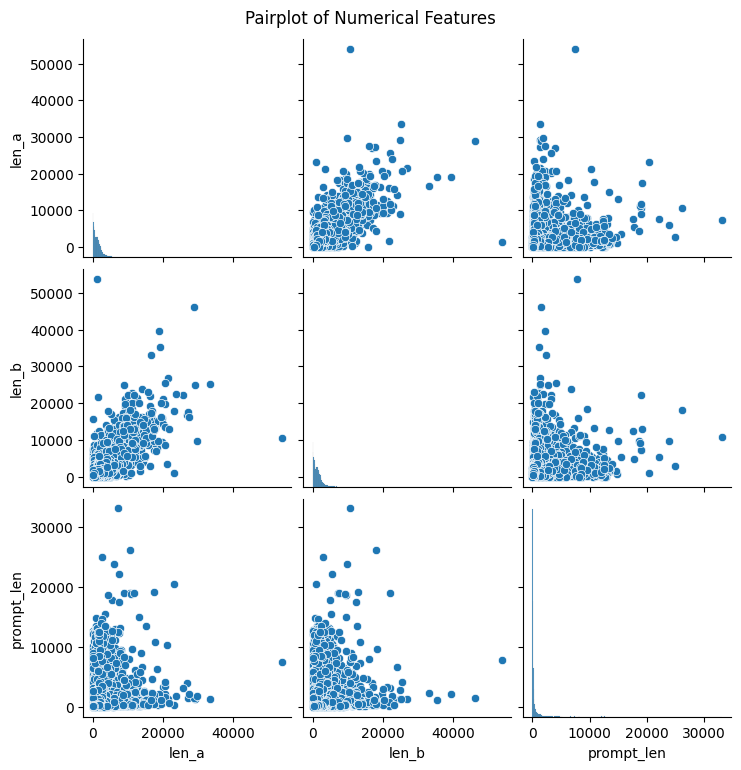

In [20]:
# Example: Correlation between numerical features
sns.pairplot(train_df[['len_a', 'len_b', 'prompt_len']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

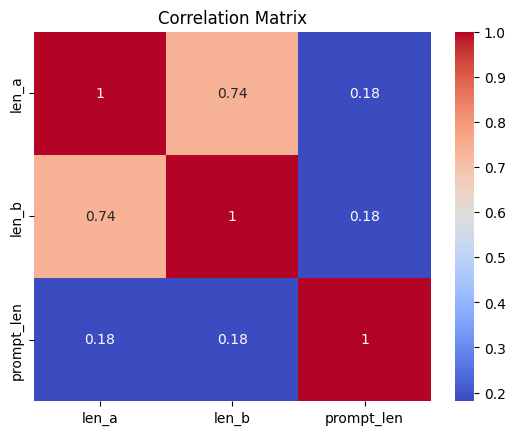

In [21]:
# Example: Correlation between numerical columns
corr = train_df[['len_a', 'len_b', 'prompt_len']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/tmp/ipykernel_1803/4051187935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_df, x='winner_model_a', y='len_a', palette='muted')


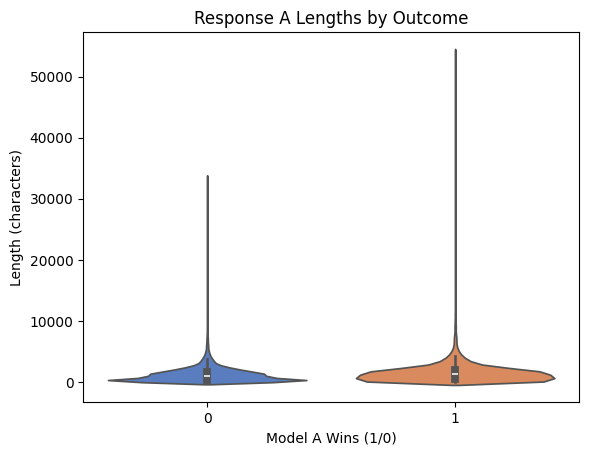

In [22]:
# Example: Compare response lengths across outcomes
sns.violinplot(data=train_df, x='winner_model_a', y='len_a', palette='muted')
plt.title('Response A Lengths by Outcome')
plt.xlabel('Model A Wins (1/0)')
plt.ylabel('Length (characters)')
plt.show()

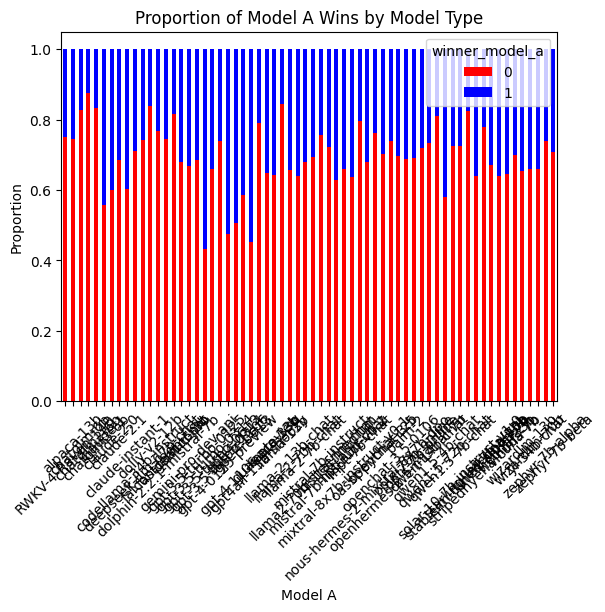

In [23]:
# Example: Winner distribution by model pair
cross_tab = pd.crosstab(train_df['model_a'], train_df['winner_model_a'])
cross_tab.div(cross_tab.sum(1), axis=0).plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.title('Proportion of Model A Wins by Model Type')
plt.xlabel('Model A')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

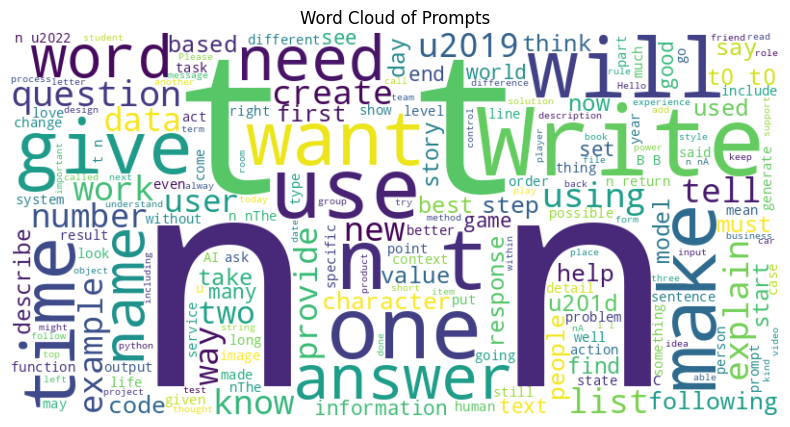

In [25]:
from wordcloud import WordCloud

# Example: Most common words in prompts
text = ' '.join(train_df['prompt'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Prompts')
plt.show()